In [1]:
import math
import numpy as np

In [2]:
B_1 = 0.9
B_2 = 0.99
epsilon = 1e-8
initial_lr = 0.5


def adam(grad, u, iteration, lr):
    m_b = B_1*u['m_b']+(1-B_1)*grad
    v_b = B_2*u['v_b']+(1-B_2)*(grad**2)
    m_unb = u['m_b']/(1-(B_1**iteration))
    v_unb = u['v_b']/(1-(B_2**iteration))
    u['m_b'] = m_b
    u['v_b'] = v_b
    return -(lr*m_unb)/(math.sqrt(v_unb)+epsilon)

def adamax(grad, u, iteration, lr):
    m_b = B_1*u['m_b']+(1-B_1)*grad
    
    v_b = max(grad**2, B_2*u['v_b'])
    m_unb = u['m_b']/(1-B_1**iteration)
    u['m_b'] = m_b
    u['v_b'] = v_b
    return -(lr*m_unb)/(math.sqrt(v_b)+epsilon)

def ams(grad, u, iteration, lr):
    m_b = B_1*u['m_b']+(1-B_1)*grad
    v_b = B_2*u['v_b']+(1-B_2)*(grad**2)
    m_unb = u['m_b']/(1-B_1**iteration)
    v_unb = u['v_b']/(1-B_2**iteration)
    u['m_b'] = m_b
    u['v_b'] = v_b
    v_unb = max(u['v_unb'], v_b)
    u['v_unb'] = v_unb
    return -(lr*m_unb)/(math.sqrt(v_unb)+epsilon)

In [6]:

def n_stochastic_case(initial_x, optimizer, max_iter, clip=True):
    updates = {'m_b':0, 'v_b':0, 'v_unb':0}
    optimal_cost = 0
    optimal_x = -1
    actual_cost = 0
    R_wrt_time = []
    x_value = []
    x = initial_x
    for i in np.arange(1, max_iter):
        cond = float(i%101==1)

        lr = initial_lr/math.sqrt(i)
        optimal_cost += cond*1010*optimal_x - (1-cond)*10*optimal_x
        actual_cost += cond*1010*x - (1-cond)*10*x
        x += optimizer(cond*1010 + (1-cond)*-10, updates, i, lr)
        if clip:
            x = np.clip(x, -1, 1)
        R_wrt_time.append((actual_cost-optimal_cost)/i)
        x_value.append(x)
        
    return R_wrt_time, x_value

def stochastic_case(initial_x, optimizer, max_iter, clip=True):
    x = initial_x
    updates = {'m_b':0, 'v_b':0, 'v_unb':0}
    optimal_x = -1
    optimal_cost = 0
    actual_cost = 0
    R_wrt_time = []
    x_value = []
    for i in np.arange(1, MAX_ITER):
        cond = float(np.random.binomial(1, 0.01, 1))

        lr = initial_lr/math.sqrt(i)
        optimal_cost += cond*1010*optimal_x - (1-cond)*10*optimal_x
        actual_cost += cond*1010*x - (1-cond)*10*x
        x += optimizer(cond*1010 + (1-cond)*-10, updates, i, lr)
        if clip:
            x = np.clip(x, -1, 1)
        R_wrt_time.append((actual_cost-optimal_cost)/i)
        x_value.append(x)
        
    return R_wrt_time, x_value



# Courbes

In [7]:
# x = np.random.uniform(-1,1)
x = 0

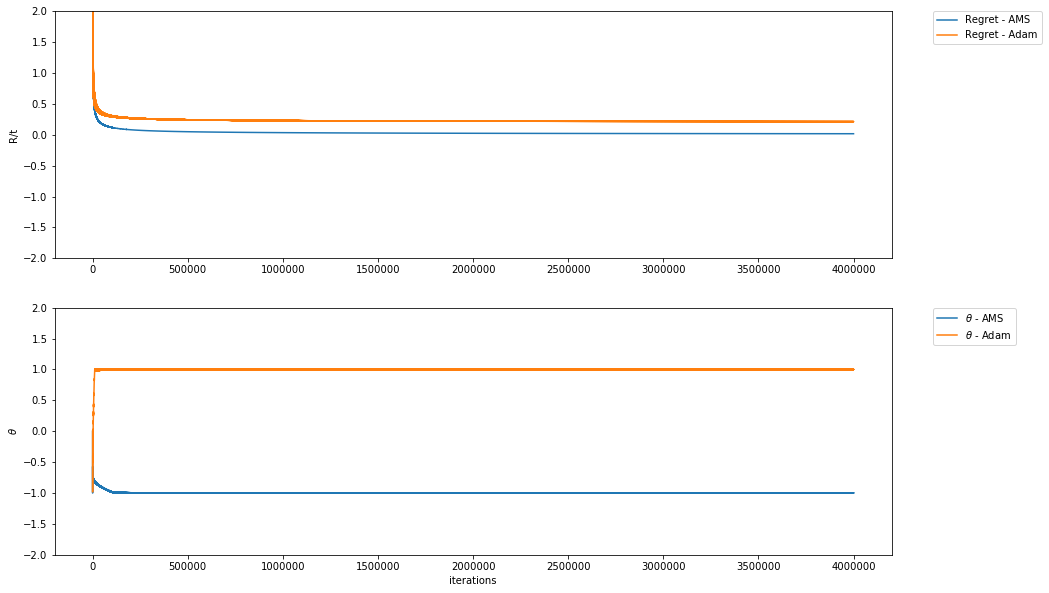

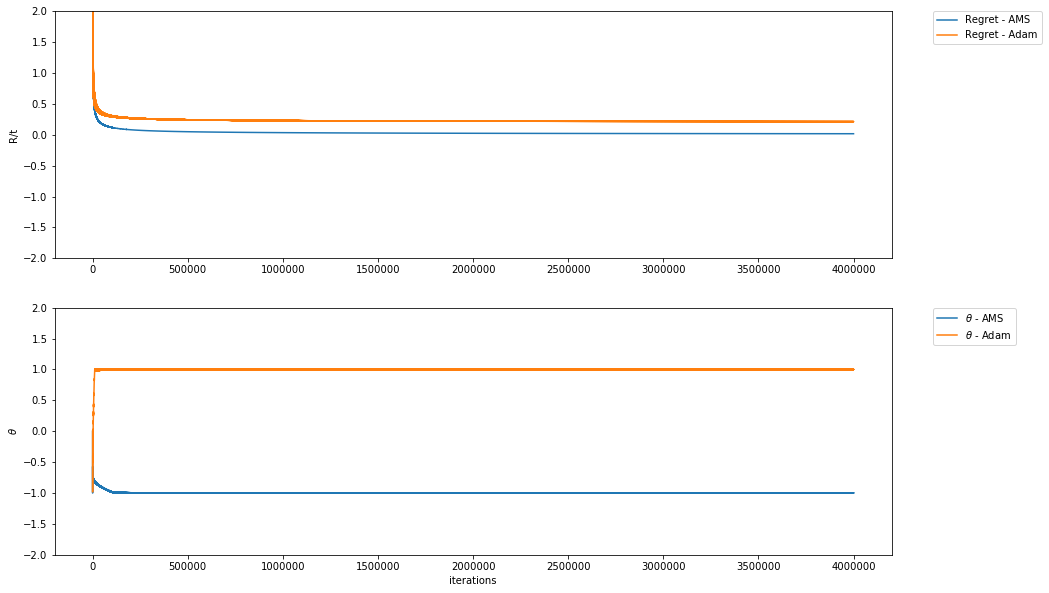

In [14]:
MAX_ITER = 4e6

R_ams, x_value_ams = n_stochastic_case(x, ams, MAX_ITER)
R_adam, x_value_adam = n_stochastic_case(x, adam, MAX_ITER)

regret_ax = plt.subplot(211)
plt.ylabel('R/t')
regret_ax.plot(R_ams, label="Regret - AMS")
regret_ax.plot(R_adam, label="Regret - Adam")
regret_ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim((-2,2))

x_ax = plt.subplot(212)
plt.ylabel(r'$\theta$')
x_ax.plot(x_value_ams, label=r"$\theta$ - AMS")
x_ax.plot(x_value_adam, label=r"$\theta$ - Adam")
x_ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel('iterations')
plt.rcParams["figure.figsize"] = [15,10]
plt.ylim((-2,2))

fig = plt.gcf()
fig.savefig('non_stochastic_case.png', bbox_inches='tight')
fig